[Click here for live site!](https://m-sender.github.io/ServiceLearning)
<center><h1>911 Call Data in Orleans Parish</h1></center>
<center><b>Max Sender and Sam Traylor</b></center>
<center>-------------------------------------------------------</center>

<center>1. Introduction</center>
<center>2. Data: Extraction, Transform and Load</center>
<center>3. Exploratory Data Analysis</center>
<center>4. What it all means?</center>



<center><h1>1. Introduction</h1></center>

In this project, we hoped to identify trends in policing and crime across the Orleans parish that may allude to some of the systemic issues police could address more effectively. We believe that with such a largely popualted and diverse area, the issues facing Oreans parish can often be obscured by preconcieved notions of whats wrong in the Parish, and that using meaningful analysis of real data could bring the realities of Orleans parish to light in a way that's been difficult up to this point.

### Data set link: [Calls for service 2021](https://data.nola.gov/Public-Safety-and-Preparedness/Calls-for-Service-2021/3pha-hum9)

What this data set is a collection of 9-1-1 calls in 2021 in the New Orleans Area. This set contains basic things such as the type of incident, where it was, the police department, and timing, and more.

## Questions

#### The direction we're going with our project will focusing more on the crime aspect of the data set. This route will be more focused on answering questions about crime in specific areas instead of the emergency response. We find this data set to be very insightful and can answer a lot of different questions:

*   Most frequent crimes in specific areas?

*   Based on the value counts of each type of crime in each area can we generalize patterns like violent crime happening more in one area, theft in another, etc?

*   What are the most frequest crimes by time of day in conjunction with a specific district?

*   Average response time by incident?

*   Average response time by incident in specific areas?

Hypothesis: In areas where there was an increase in the frequencry of crimes, the response time is longer than in areas where the frequency of crimes was lower. Also, in areas low income, the response time is longer than in areas with high income.

#### We will also be looking at and loading in Census data pertaining to the relavent zipcodes that are in the Calls to Service dataset.


<b>Before we begin, we feel it is important to explain that District 0 is an anomaly that we don’t believe corresponds to any real geographic region in Orleans parish. From what we can tell district 0 was an aggregation of all the calls that fell slightly outside the boundaries of the police districts in Orleans parish, but were still responded to by a police department inside Orleans Parish. Thus, it doesn’t cleanly map to any real district and ends up in zero.</b>



## Collaboration plan:

We plan to collaborate via meetings over zoom, and store our data in a shared github. Any particular challenges that have to be solved in a pair-programming setting will be dealt with using live share on vscode.



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

<center><h1>2. Extraction, Transform and Load </h1></center>

In [71]:
df_Calls_untidy = pd.read_csv("../data/Calls_for_Service_2021.csv")
df_zones_untidy = pd.read_csv("../data/Police_Zones_data.csv")

# Calls For Service 2021 
 **Columns Explained:**
* TypeText: Type of incident (text)
* Priority: Priority of incident (ID)
* InitialTypeText: Initial type of incident (text)
* InitialPriority: Initial priority of incident (ID)
* TimeCreate: Time of incident
* TimeDispatch: Time of dispatch
* TimeArrive: Time of arrival
* TimeClose: Time of closure
* DispositionText: Disposition of incident (text)
* SelfInitiated: Self-initiated (Y or N)
* BLOCK_ADDRESS: Block address of incident
* Zip: Zip code of incident
* PoliceDistrict: Police district of incident (ID)
* Location: Location of incident (ID)
Each entry in the dataset in a unique call to 911 dispatch with relevant information.

# Tidying Up Data

In [72]:
df_Calls = df_Calls_untidy.drop(columns=['NOPD_Item','Type','InitialType','MapX','MapY','Disposition','Beat'])

df_Calls = df_Calls.astype({'TimeCreate':'datetime64[ns]','TimeDispatch':'datetime64[ns]',"TimeArrive":'datetime64[ns]',"TimeClosed":'datetime64[ns]'})

df_Calls["responseTime"] = df_Calls.TimeArrive - df_Calls.TimeDispatch

df_Calls = df_Calls[df_Calls['responseTime'] > pd.Timedelta(0)]
df_Calls.dropna(subset=['responseTime'], inplace=True)

df_Calls

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,BLOCK_ADDRESS,Zip,PoliceDistrict,Location,responseTime
1,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,036XX Baronne St,70115,6,POINT (-90.09455243 29.92938301),0 days 00:04:02
7,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-01-01 00:04:11,2021-01-01 00:59:42,2021-01-01 00:59:57,2021-01-01 01:06:54,GONE ON ARRIVAL,N,011XX Blk Tupelo St,70117,5,POINT (-90.01110609 29.96044253),0 days 00:00:15
8,DISCHARGING FIREARM,1A,DISCHARGING FIREARM,2D,2021-01-01 00:04:19,2021-01-01 00:53:10,2021-01-01 01:35:08,2021-01-01 01:56:55,REPORT TO FOLLOW,N,012XX Blk Elysian Fields Ave,70116,5,POINT (-90.05709394 29.97004982),0 days 00:41:58
9,FIREWORKS,1A,FIGHT,2D,2021-01-01 00:06:10,2021-01-01 02:51:34,2021-01-01 03:09:39,2021-01-01 03:22:54,GONE ON ARRIVAL,N,016XX S Liberty St,70113,6,POINT (-90.08341098 29.94165311),0 days 00:18:05
11,AUTO ACCIDENT WITH INJURY,2D,AUTO ACCIDENT WITH INJURY,2D,2021-01-01 00:06:45,2021-01-01 00:11:23,2021-01-01 01:13:38,2021-01-01 04:22:50,REPORT TO FOLLOW,N,St Claude Bridge Westbound,70117,5,POINT (-90.02737517 29.96389326),0 days 01:02:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353249,AUTO ACCIDENT,1A,AUTO ACCIDENT,1E,2021-10-19 22:50:13,2021-10-19 22:59:35,2021-10-19 22:59:41,2021-10-19 23:52:54,REPORT TO FOLLOW,N,Canal St & Saint Charles Ave,70130,8,POINT (-90.06917089 29.95309407),0 days 00:00:06
353255,COMPLAINT OTHER,1J,AGGRAVATED BURGLARY,2C,2021-10-19 23:19:17,2021-10-19 23:21:22,2021-10-19 23:27:05,2021-10-19 23:46:14,Necessary Action Taken,N,078XX Unity Dr,70128,7,POINT (-89.97145368 30.05344836),0 days 00:05:43
353256,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-10-19 23:28:31,2021-10-19 23:29:11,2021-10-19 23:36:26,2021-10-19 23:58:08,GONE ON ARRIVAL,N,Saint Bernard Ave & N Broad St,70119,1,POINT (-90.07184858 29.98336334),0 days 00:07:15
353258,DISCHARGING FIREARM,2D,DISCHARGING FIREARM,2D,2021-10-19 23:29:12,2021-10-19 23:30:30,2021-10-19 23:37:20,2021-10-19 23:46:06,GONE ON ARRIVAL,N,021XX N Broad St,70119,5,POINT (-90.06832158 29.98677089),0 days 00:06:50


Here, we've dropped some uncessesary columns casted the TimeCreate, TimeDispatch, and TimeArrived columns to the datettime64[ns] type for easier analysis, and created a response time column which shows the time it took from the moment of dispatch to the moment of arrival. We've also dropped calls where the reported dispatch and arrival times result in a negative response time as that's clearly not possible, and we've dropped rows where the response time could not be calculated (had a value of NaN).

# Getting Relevant Data

To make our data easier to work with and remove outliers, we have chosen to work with the 3rd to 30th most popular types of crimes by frequency in this dataset.

In [73]:
new_df = df_Calls.TypeText.value_counts()
top_Call_df = df_Calls[df_Calls.TypeText.isin(new_df[2:30].index)]

The first and second most common types of call were disturbance (other) and complaint other, both of which tell us next to nothing about actual crime in the area and only serve to skew the dataset. By eliminating those, we're reserving these top 30 spots for call types that tell us more about actual crime trends.

In [74]:
zips = ['70124', '70115', np.nan, '70131', '70126', '70114', '70117', '70116', '70113',
 '70119', '70112', '70122', '70127', '70130', '70128', '70118', '70125', np.nan
 ,'70129', '70148']
income = [96844,66499,np.nan,52312,27026,30806,30264,48919,18148,39827,
          49439,39506,27190,53946,36414,48919,46526,np.nan,36950,np.nan] 
health = [3.8,7.2,np.nan,8.9,9.0,10.8,13.6,12.7,14.5,11.6,
          12.1,9.2,8.6,8.1,7.5,7.6,7.9,np.nan,11.7,np.nan] #percent without health care coverage from 2019
employment = [70.5, 66.1, np.nan, 59.5, 51.4, 50.7, 53.3, 54.7, 47.1, 55.5, 69.1, 69.1, 54.2, 50.6, 66.5, 53.2, 57.6,
            56.5, np.nan, 52.5] 
education = [68.3, 60.4, np.nan, 34.1, 20.9, 21.9, 25.9, 41.3, 23.5, 38.1, 58.2, 31.1, 19.4, 57.8, 26.8, 50.5, 41.2,
            np.nan, 13.2, np.nan] 
census_zip_df = pd.DataFrame({"Zip":zips,"Income":income,"Health":health,"Employment":employment,"Education":education})  
census_zip_df.dropna(axis=0)
top_Call_df = top_Call_df.merge(census_zip_df, on="Zip")


In this cell, we imported data from the census bureau that can tell us a bit more about the demographic of the areas, which may help determine whether certain systemic and environmental factors like mean income, level of education, employment rates, etc. correlate with crime. It is of interest to us whether or not these factors correlate to a prevalence of a certain type of crime, an overall crime level, or a low/high response time.

In [75]:
# PLOT FUNCTION
def plot_regress(data):
    k= -1
    fig,ax = plt.subplots(6, 5, figsize=(30,100))
    for i in data.columns:
        k+=1
        m = -1
        for j in data.columns:
            if i==j:
                continue
            else:
                m+=1
                sns.regplot(x=data[j], y=data[i],scatter_kws={'alpha':0.5},ax=ax[k][m],marker='x')
def get_avgs(data,groupby):
    view_3d_df = data.groupby(groupby)
    seconds_avg = view_3d_df.responseSeconds.mean()
    income_avg = view_3d_df.Income.mean()
    employment_avg = view_3d_df.Employment.mean()
    type_avg = view_3d_df.typeRank.mean()
    health_avg = view_3d_df.Health.mean()
    edu_avg = view_3d_df.Education.mean()

    avg_df = pd.DataFrame({'Seconds':seconds_avg, 'Income':income_avg, 'Employment':employment_avg, 'typeRank':type_avg, 'Health':health_avg, 'Education':edu_avg})
    return avg_df
    

<center><h1> <b>3. Exploratory Data Analysis</b> </h1></center>


Here, we divide the top 30 most common crimes into categories, including routine_noncriminal, nonviolent_crime, potentially_violent_crime, and violent_crime. These categories give a little bit of insight and allow for more useful classification than just trying to predict the 1 crime that will happen at a certain time or in a certain district.

We also converted Response Time into Seconds so that we could differentiate between the times of day that the calls happened and the use classification on those time periods.

In [76]:
routine_noncriminal = ["AUTO ACCIDENT", "AUTO ACCIDENT WITH INJURY", "BUSINESS CHECK", 'DIRECTED PATROL', 
                       'DISTURBANCE (OTHER)', "MEDICAL", 'MENTAL PATIENT', 'NOISE COMPLAINT', 'RETURN FOR ADDITIONAL INFO',
                       'SUSPICIOUS PERSON', 'TRAFFIC INCIDENT', 'TRAFFIC STOP', 'TOW IMPOUNDED VEHICLE (PRIVATE)',
                       'TRAFFIC STOP']

violent_crime = ['FIGHT', 'HIT & RUN', 'SIMPLE BATTERY', 'SIMPLE BATTERY DOMESTIC']
nonviolent_crime = ['SIMPLE BURGLARY VEHICLE', 'THEFT BY FRAUD', 'SIMPLE CRIMINAL DAMAGE','EXTORTION (THREATS)','AREA CHECK','RESIDENCE BURGLARY']

potentially_violent_crime = ['THEFT', 'BURGLAR ALARM, SILENT', 'DISCHARGING FIREARM', 'AUTO THEFT', 'HOLD UP ALARM',
                             'RECKLESS DRIVING', 'DOMESTIC DISTURBANCE','PROWLER','AGGRAVATED ASSAULT'] 
top_Call_df["typeCall"] = top_Call_df.TypeText.map(lambda x: 'routine_noncriminal' if (x in routine_noncriminal) else 'violent_crime' if (x in violent_crime) else 'nonviolent_crime' if (x in nonviolent_crime) else 'potentially_violent_crime' if (x in potentially_violent_crime) else "other")
top_Call_df["typeBasicRank"] = top_Call_df.TypeText.map(lambda x: 0 if (x in routine_noncriminal) else 3 if (x in violent_crime) else 1 if (x in nonviolent_crime) else 2 if (x in potentially_violent_crime) else np.nan)

top_Call_df['responseSeconds'] = top_Call_df.responseTime.dt.seconds
top_Call_df

,TypeText,Priority,InitialTypeText,InitialPriority,TimeCreate,TimeDispatch,TimeArrive,TimeClosed,DispositionText,SelfInitiated,...,PoliceDistrict,Location,responseTime,Income,Health,Employment,Education,typeCall,typeBasicRank,responseSeconds
0,"BURGLAR ALARM, SILENT",1A,"BURGLAR ALARM, SILENT",2E,2021-01-01 00:01:34,2021-01-01 03:39:56,2021-01-01 03:43:58,2021-01-01 03:51:24,Necessary Action Taken,N,...,6,POINT (-90.09455243 29.92938301),0 days 00:04:02,66499.0,7.2,66.1,60.4,potentially_violent_crime,2,242
1,FIGHT,2D,FIGHT,2D,2021-01-01 00:18:32,2021-01-01 01:45:23,2021-01-01 01:49:07,2021-01-01 01:56:15,GONE ON ARRIVAL,N,...,6,POINT (-90.0867337 29.92955006),0 days 00:03:44,66499.0,7.2,66.1,60.4,violent_crime,3,224
2,"BURGLAR ALARM, SILENT",2E,"BURGLAR ALARM, SILENT",2E,2021-01-01 03:46:26,2021-01-01 03:48:02,2021-01-01 03:52:11,2021-01-01 04:03:06,Necessary Action Taken,N,...,2,POINT (-90.11372755 29.93293323),0 days 00:04:09,66499.0,7.2,66.1,60.4,potentially_violent_crime,2,249
3,MENTAL PATIENT,2C,MENTAL PATIENT,2C,2021-01-01 03:48:49,2021-01-01 03:52:19,2021-01-01 03:53:44,2021-01-01 05:07:19,Necessary Action Taken,N,...,6,POINT (0 0),0 days 00:01:25,66499.0,7.2,66.1,60.4,routine_noncriminal,0,85
4,SIMPLE BURGLARY VEHICLE,1G,SIMPLE BURGLARY VEHICLE,1G,2021-01-01 09:44:45,2021-01-01 09:53:42,2021-01-01 10:14:09,2021-01-01 10:19:32,REPORT TO FOLLOW,N,...,2,POINT (-90.10689239 29.93592128),0 days 00:20:27,66499.0,7.2,66.1,60.4,nonviolent_crime,1,1227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97284,HIT & RUN,1A,HIT & RUN,1G,2021-01-31 03:32:22,2021-01-31 03:36:11,2021-01-31 03:54:29,2021-01-31 04:53:03,REPORT TO FOLLOW,N,...,4,POINT (-90.0434741 29.9546932),0 days 00:18:18,NaN,NaN,56.5,NaN,violent_crime,3,1098
97285,AREA CHECK,1K,AREA CHECK,1K,2021-02-01 01:34:38,2021-02-01 01:34:38,2021-02-01 01:34:46,2021-02-01 02:24:41,Necessary Action Taken,N,...,7,POINT (-89.96168257 30.04809477),0 days 00:00:08,NaN,NaN,NaN,NaN,nonviolent_crime,1,8
97286,AREA CHECK,1K,AREA CHECK,1K,2021-02-01 01:34:38,2021-02-01 01:34:38,2021-02-01 01:34:46,2021-02-01 02:24:41,Necessary Action Taken,N,...,7,POINT (-89.96168257 30.04809477),0 days 00:00:08,NaN,NaN,56.5,NaN,nonviolent_crime,1,8
97287,AUTO ACCIDENT,1A,AUTO ACCIDENT,1E,2021-02-01 09:44:29,2021-02-01 10:49:02,2021-02-01 11:10:22,2021-02-01 11:19:25,DUPLICATE,N,...,5,POINT (-90.02953867 29.98837106),0 days 00:21:20,NaN,NaN,NaN,NaN,routine_noncriminal,0,1280


# Basic Analysis

Below, we begin doing a basic surface level analysis of each Police District and Zipcode.

Here is the mean response time for each District.

Average response time in District 0 :  0 days 00:11:45.591463414
Average response time in District 1 :  0 days 00:08:47.907437042
Average response time in District 2 :  0 days 00:09:48.884627281
Average response time in District 3 :  0 days 00:12:10.527092955
Average response time in District 4 :  0 days 00:08:59.043777617
Average response time in District 5 :  0 days 00:12:47.318226200
Average response time in District 6 :  0 days 00:09:46.255989811
Average response time in District 7 :  0 days 00:19:59.466038191
Average response time in District 8 :  0 days 00:09:56.083996463


<AxesSubplot:title={'center':'Average Response Time by District'}, xlabel='PoliceDistrict', ylabel='Seconds'>

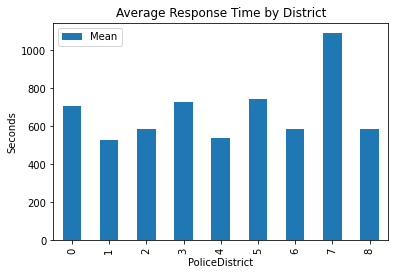

In [77]:
districtMeans = pd.DataFrame(index=top_Call_df["PoliceDistrict"].unique(), columns=["PoliceDistrict","Mean"])
districtMeans["PoliceDistrict"] = top_Call_df["PoliceDistrict"].sort_values().unique()
means = []

mean_by_zone = top_Call_df.groupby(["PoliceDistrict"])
for group in mean_by_zone:
    print("Average response time in District", group[0], ": ", group[1].responseTime.mean())
    means.append(group[1].responseSeconds.mean())
    
districtMeans["Mean"] = means
 
districtMeans.plot.bar(x="PoliceDistrict", y="Mean", ylabel="Seconds",title="Average Response Time by District")

In [78]:
type_by_district = top_Call_df[['PoliceDistrict','TypeText']].pivot_table(index=['PoliceDistrict'],columns=['TypeText'],aggfunc=np.count_nonzero)
type_by_zipcode = top_Call_df[['Zip','TypeText']].pivot_table(index=['Zip'],columns=['TypeText'],aggfunc=np.count_nonzero)

df_Calls_marg_district = type_by_district.T / type_by_district.T.sum()
df_Calls_marg_zip = type_by_zipcode.T / type_by_zipcode.T.sum()
pop_district = type_by_district.T.idxmax()
pop_zip = type_by_zipcode.T.idxmax()
type_by_district_with_freq =  pd.merge(type_by_district, pop_district.rename('Most Frequent'), 'outer',on='PoliceDistrict')
type_by_zipcode_with_freq = pd.merge(type_by_zipcode, pop_zip.rename('Most Frequent'), 'outer',on='Zip')

In [79]:
print("Most Frequent Crimes by District:") 
print(pop_district)

Most Frequent Crimes by District:
PoliceDistrict
0     DOMESTIC DISTURBANCE
1               AREA CHECK
2    BURGLAR ALARM, SILENT
3    BURGLAR ALARM, SILENT
4               AREA CHECK
5     DOMESTIC DISTURBANCE
6    BURGLAR ALARM, SILENT
7     DOMESTIC DISTURBANCE
8    BURGLAR ALARM, SILENT
dtype: object


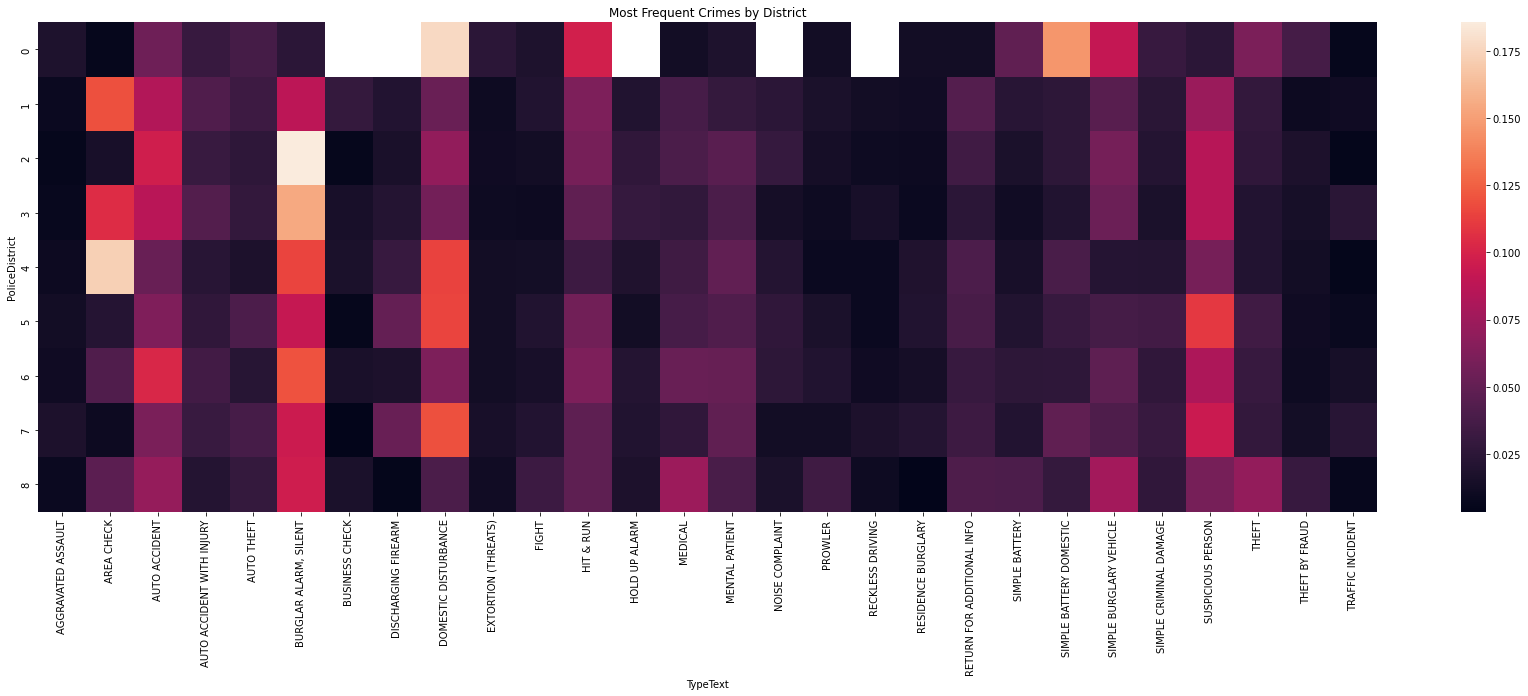

In [80]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by District")

heat_map_districts_marginal = sns.heatmap(df_Calls_marg_district.T)

The graph above is showing the conditional distribution of types of crime by police district, displayed in a heatmap.


<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by District'}, ylabel='PoliceDistrict'>

<AxesSubplot:title={'center':'Count of type of Crime by District'}, ylabel='PoliceDistrict'>

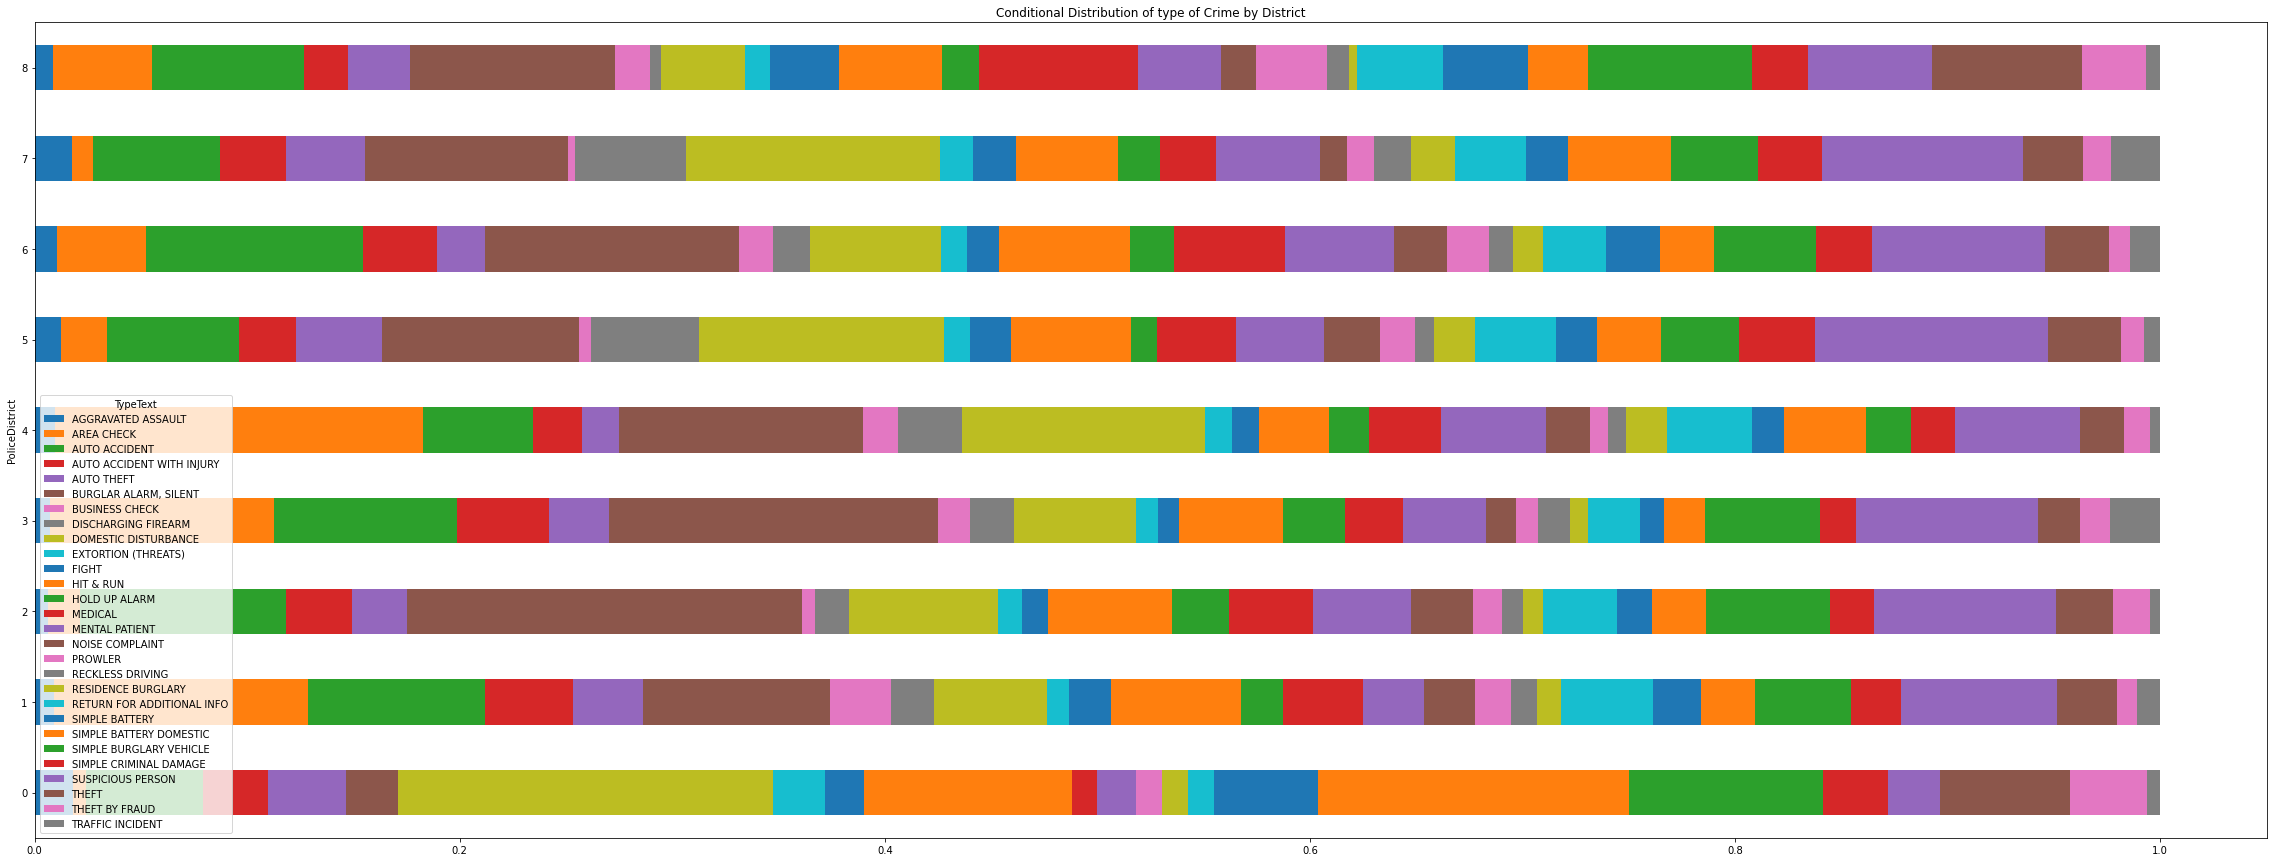

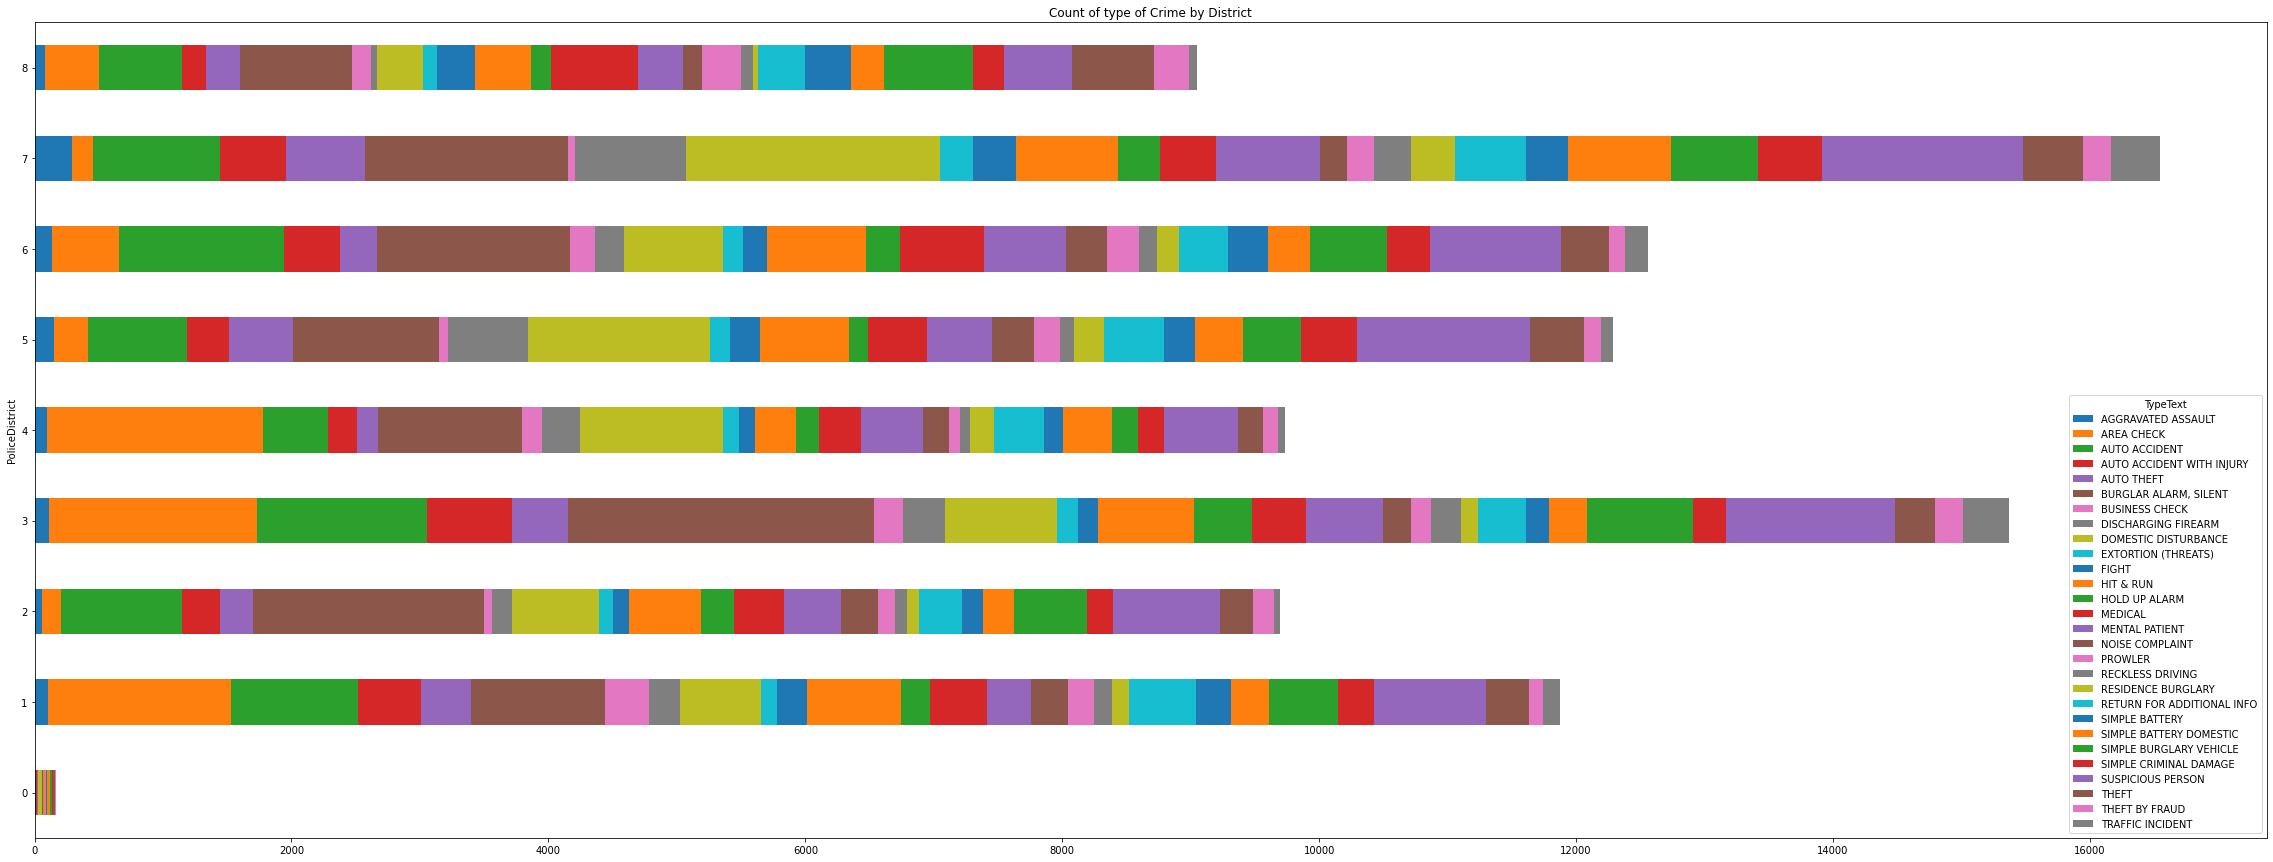

In [81]:
df_Calls_crossTab = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by District"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by District")

The first graph above is the Conditional Distribution of type of Crime by District. The conditional distribution is the probability of a crime type happening in a district. The conditional distribution is calculated by taking the number of crimes of a certain type in a district and dividing it by the total number of crimes in that district.


The second graph above is the Count of type of Crime by District. The count is the number of crimes of a certain type in a district.


Below is where we begin to look at Zipcodes.

Most Frequent Crimes by Zipcode:
Zip
70112            AUTO ACCIDENT
70113            AUTO ACCIDENT
70114               AREA CHECK
70115    BURGLAR ALARM, SILENT
70116    BURGLAR ALARM, SILENT
70117     DOMESTIC DISTURBANCE
70118    BURGLAR ALARM, SILENT
70119               AREA CHECK
70122    BURGLAR ALARM, SILENT
70124               AREA CHECK
70125    BURGLAR ALARM, SILENT
70126     DOMESTIC DISTURBANCE
70127     DOMESTIC DISTURBANCE
70128     DOMESTIC DISTURBANCE
70129     DOMESTIC DISTURBANCE
70130    BURGLAR ALARM, SILENT
70131               AREA CHECK
70148            AUTO ACCIDENT
dtype: object


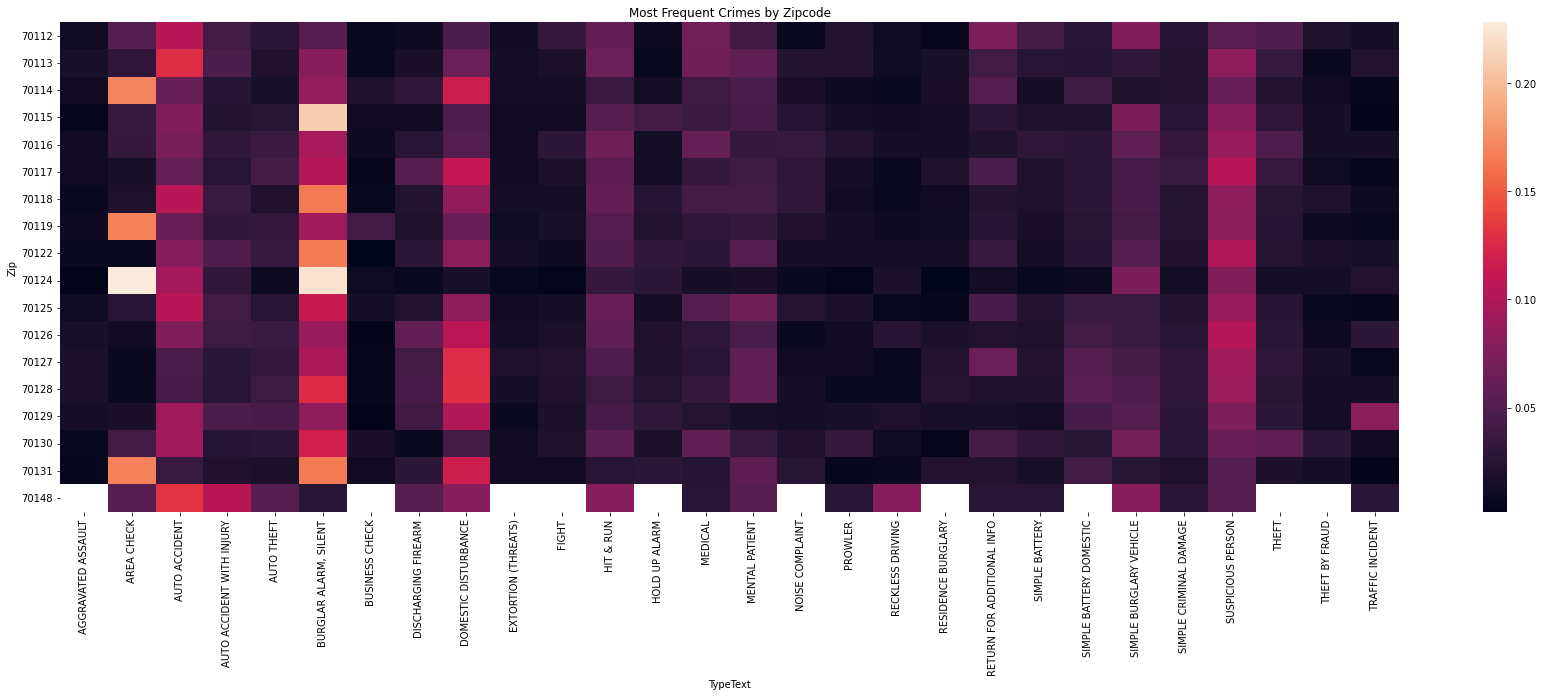

In [82]:
ax = plt.subplots(figsize=(30,9))
plt.title("Most Frequent Crimes by Zipcode")
print("Most Frequent Crimes by Zipcode:")
print(pop_zip)
heat_map_zipcodes_marginal = sns.heatmap(df_Calls_marg_zip.T)

The graph above is showing the conditional distribution of types of crime by zipcode, displayed in a heatmap.

<AxesSubplot:title={'center':'Conditional Distribution of type of Crime by Zipcode'}, ylabel='Zip'>

<AxesSubplot:title={'center':'Count of type of Crime by Zipcode'}, ylabel='Zip'>

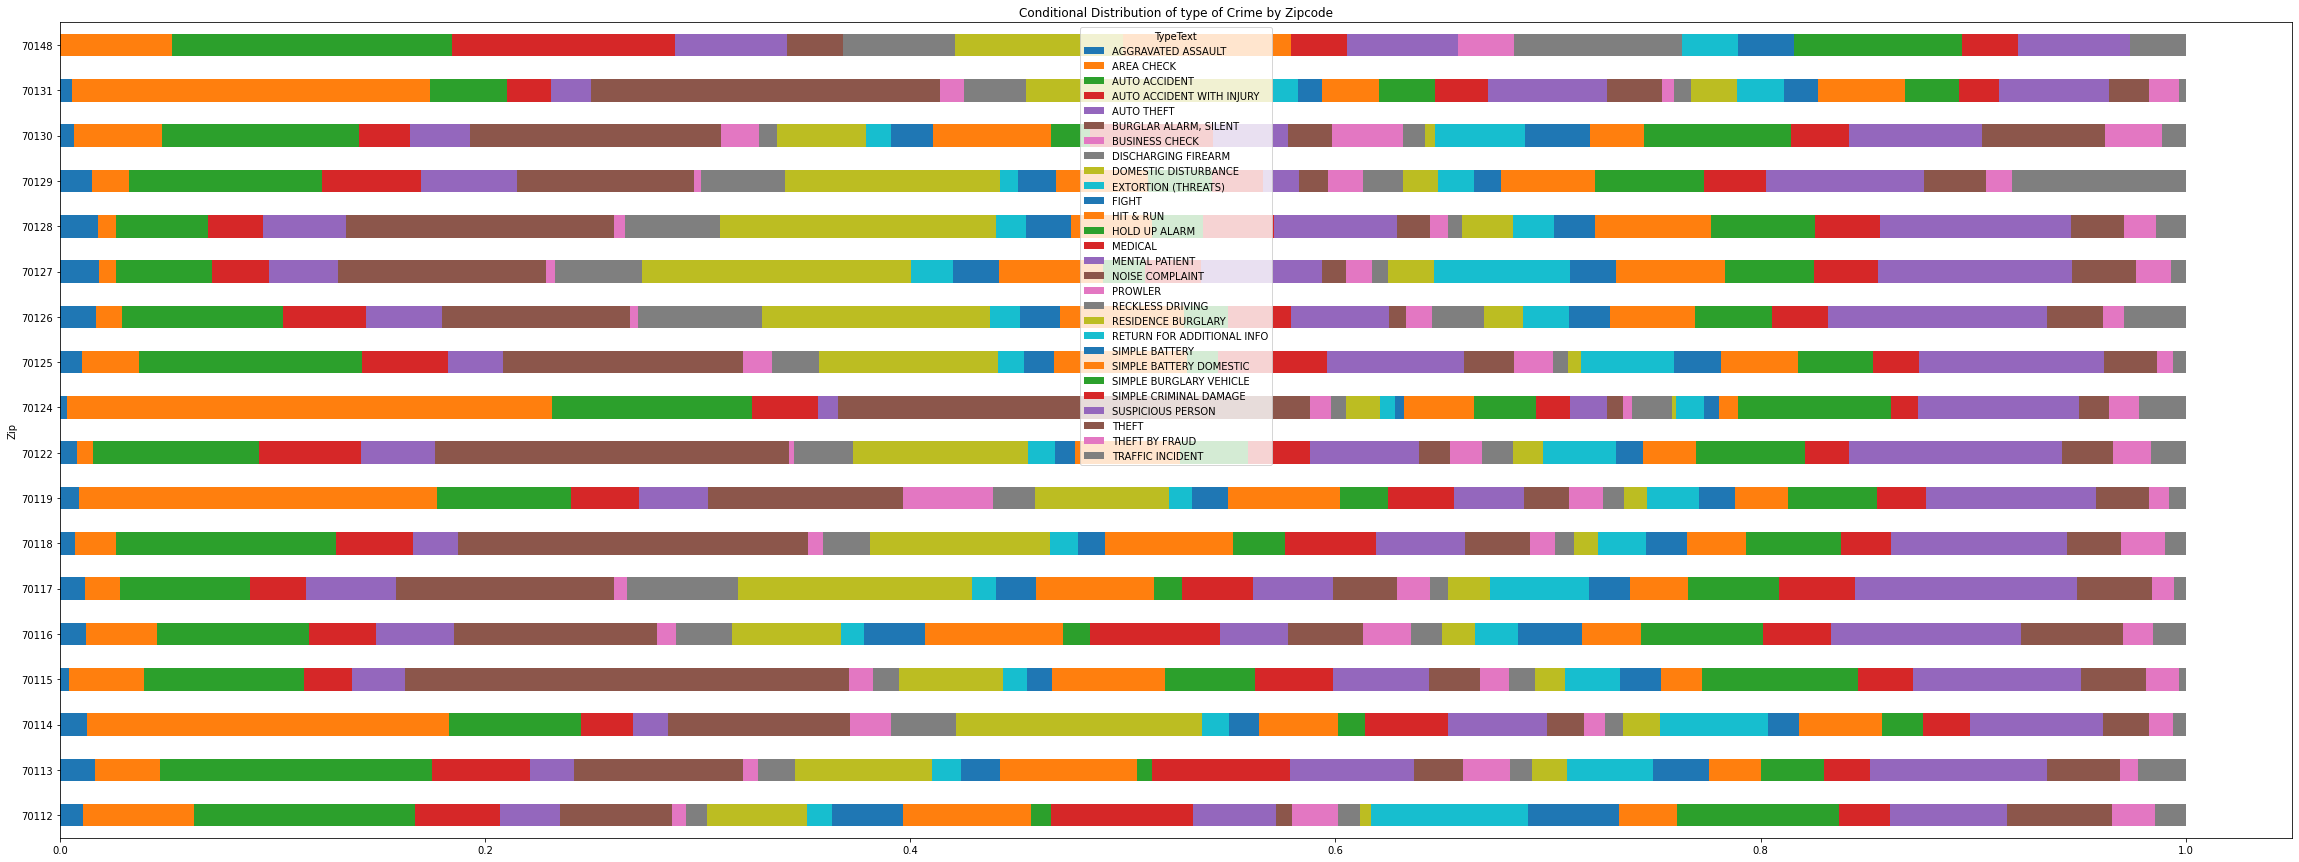

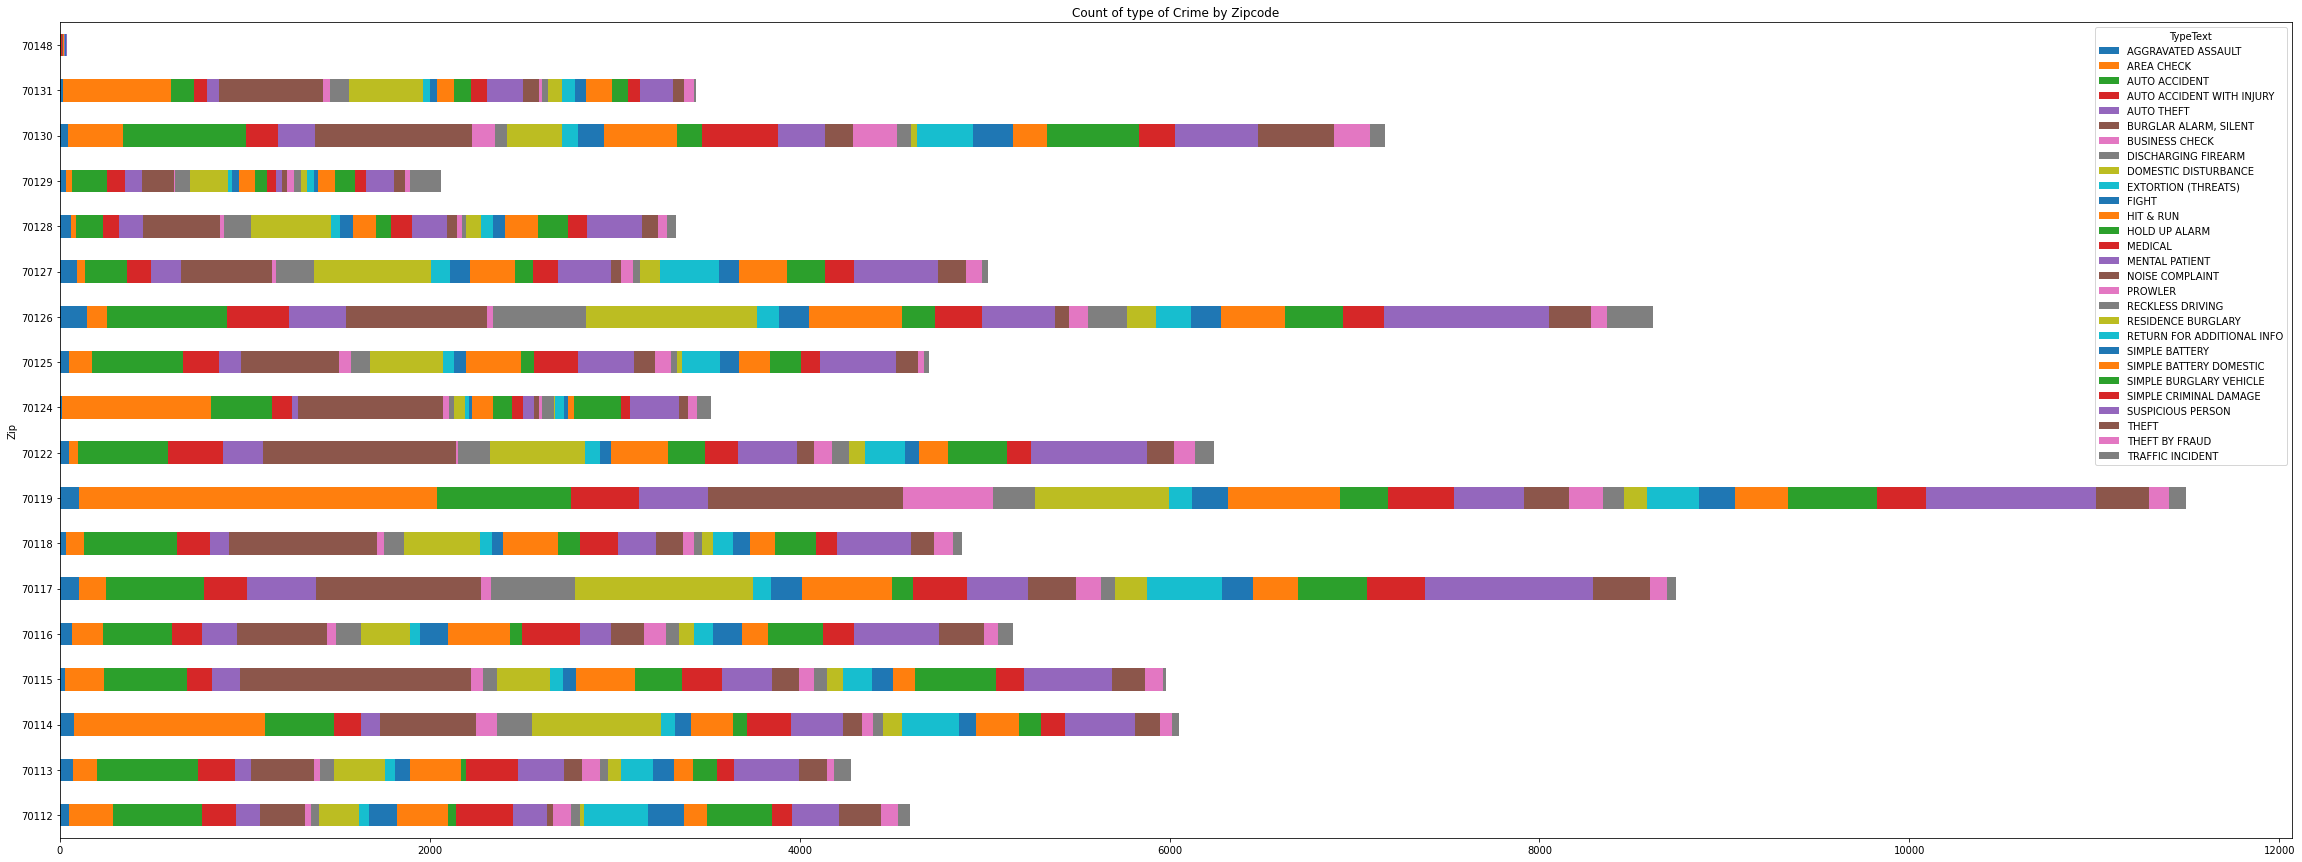

In [83]:
df_Calls_crossTab = pd.crosstab(top_Call_df['Zip'],top_Call_df['TypeText'])
display((df_Calls_crossTab.T / df_Calls_crossTab.T.sum()).T.plot.barh(stacked=True, legend=True,figsize=(40,15),title="Conditional Distribution of type of Crime by Zipcode"))
df_Calls_crossTab.plot.barh(stacked=True, legend=True,figsize=(40, 15),title="Count of type of Crime by Zipcode")

The first graph above is the Conditional Distribution of type of Crime by Zipcode. The conditional distribution is the probability of a crime type happening in a Zipcode. 

The second graph above is the Count of type of Crime by Zipcode. The count is the number of crimes of a certain type in a Zipcode.


# More in Depth Analysis
<strong>A. Analyzing Police Districts</strong>

Here is where we begin a more in depth analyses of our data with regards to the Police Districts.

To begin with, we first looked at the Response Time of Police Districts by Crime Type.


<AxesSubplot:title={'center':'Crime Severities Count by District'}, xlabel='Response Time (Seconds)', ylabel='PoliceDistrict'>

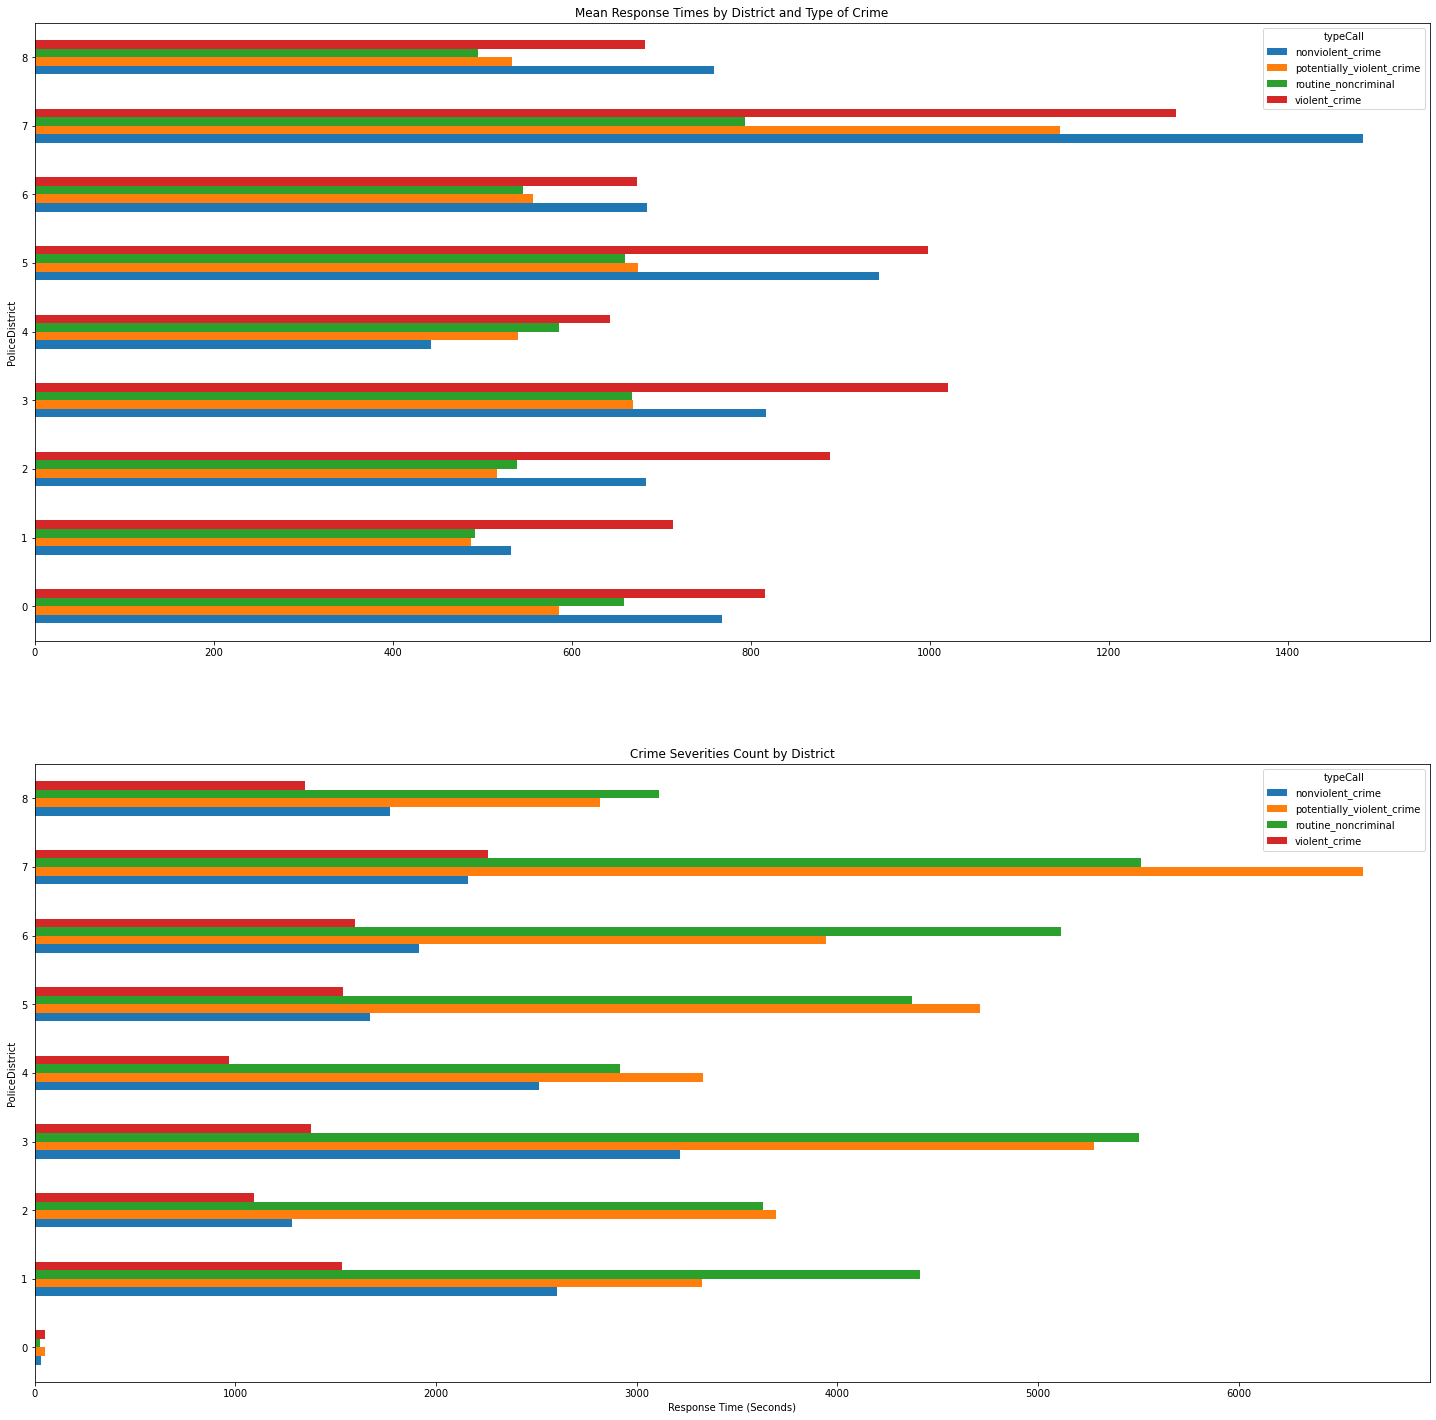

In [84]:
fig, ax = plt.subplots(2,1,figsize=(25,25))
resp_by_type_and_district = top_Call_df.groupby(['PoliceDistrict','typeCall']).responseSeconds.mean().unstack()
resp_by_type_and_district.plot.barh(ax=ax[0],stacked=False, legend=True, title="Mean Response Times by District and Type of Crime")
plt.xlabel('Response Time (Seconds)')

df_calls_top_district_typeRank = pd.crosstab(top_Call_df['PoliceDistrict'],top_Call_df['typeCall'])
df_calls_top_district_typeRank.plot.barh(ax =ax[1],stacked=False, legend=True,title="Crime Severities Count by District")

The first graph shown above is a bar graph where we grouped our data by the mean Response Times (Seconds) and by Police District. This graph by itself shows us how long on average certain districts responded to each type of crime. As we can see, District 7 was struggling in most categories compared to the other districts.
Another interesting finding was that violent crimes took longer to be responded to than routine non-criminal in all districts.

Things get more interesting as we compare the two graphs above.

This is a graph of the Frequency of Certain Types of Crime by District. District 7, which as we mentioned earlier had the highest overall response time,  also had the most amount of crimes compared to the other districts. 

We can see here that Routine Non Criminal crimes like Traffic Stops and Area Checks, despite being super high in frequency compared to other types of crime, were responded too much quicker than the other types.

Something to keep in mind is the differences in the 4 categories of crime we have being analyzed. Routine Non Criminal category contains crimes such as Traffic Stops and the like, so it is important to recognize people usually don’t go to certain roads and areas to get pulled over and receive a ticket.

On the other hand, Violent and Potentially Violent Crimes like Theft, Fighting, Battery, etc., people sometimes do choose the area to commit these crimes. 

When we look at Violent and Potentially Violent Crimes, where the area is more so chosen than by chance, it is interesting to look at the frequency for the Districts.
Here, when we compare the past two graphs, we can see that there is an upward trend of the frequency of each type of crime and the length of the response taken.




To explore this correlation further, we can look at the exact trends of frequency of crime by district and the response time of each type of crime.

Shown below are Regression Plots for each Police District comparing the response time of each type of crime to the frequency of that crime.

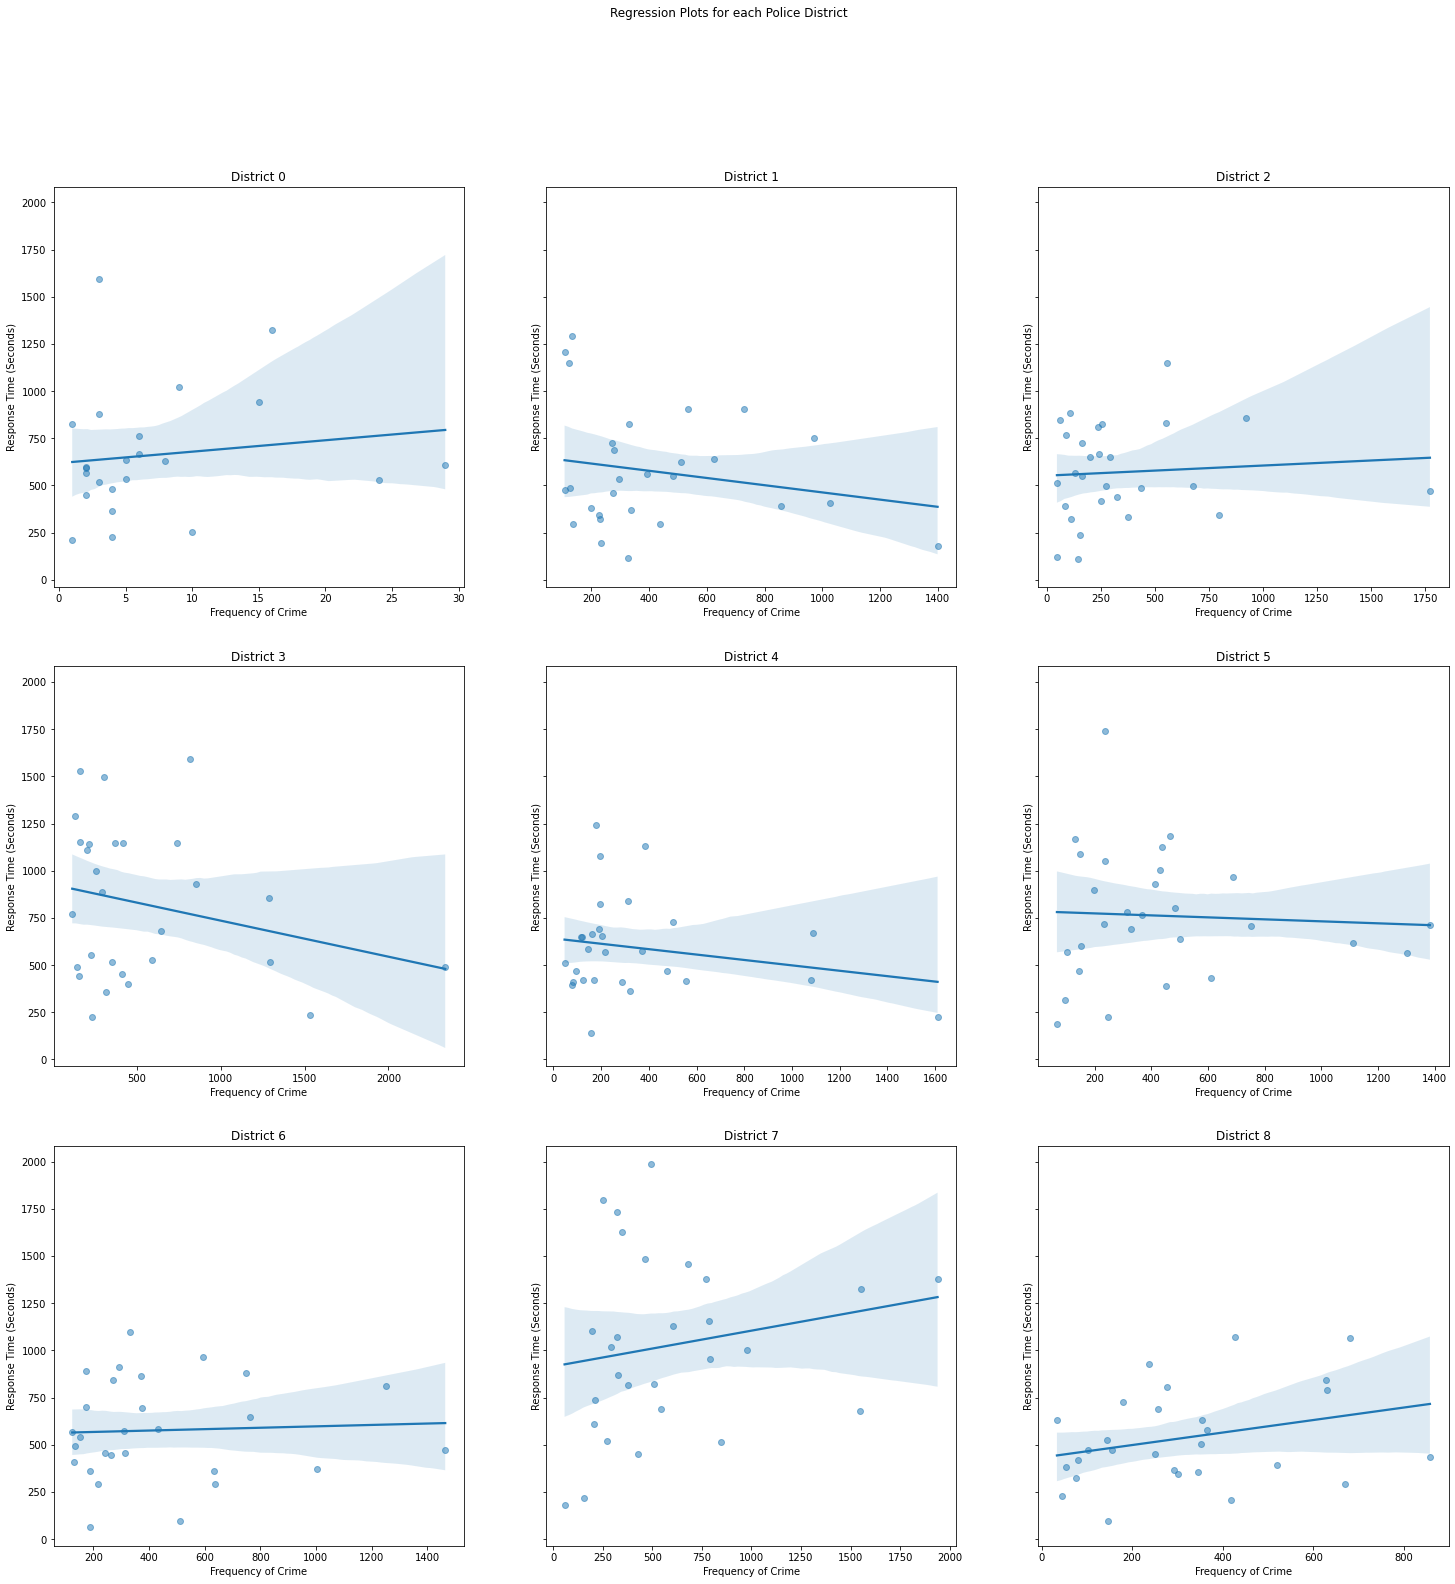

In [85]:
count_by_type_crime_and_district = top_Call_df.groupby(['PoliceDistrict','TypeText']).Income.count().unstack()
resp_by_type_and_district = top_Call_df.groupby(['PoliceDistrict','typeCall']).responseSeconds.mean().unstack()
resp_by_type_crime_and_district = top_Call_df.groupby(['PoliceDistrict','TypeText']).responseSeconds.mean().unstack()

fig,ax = plt.subplots(3,3,figsize=(25,25),sharey=True)
fig.suptitle('Regression Plots for each Police District')
for i in range(9):
    sns.regplot(x=count_by_type_crime_and_district.iloc[i,:], y=resp_by_type_crime_and_district.iloc[i,:],scatter_kws={'alpha':0.5},ax=ax[i//3][i%3],marker='o').set_title('District '+str(i))
    ax[i//3][i%3].set_xlabel('Frequency of Crime')
    ax[i//3][i%3].set_ylabel('Response Time (Seconds)')

As we can see above, many districts show a positive correlation between the response time and the frequency of certain types of crime.

This may indicate that certain Police Districts are "understaffed" and need more resources to respond to certain types of crimes indicated by their increased time to respond. 

Another way to look at the data is by taking on a different perspective. If someone has a preconcieved notion that a Police District responds slower to certain types of crimes, they may be more inclined to commit crimes in areas covered by that District.

# B. Analyzing Zipcodes

Text(0.5, 1.0, 'Education vs Response Time')

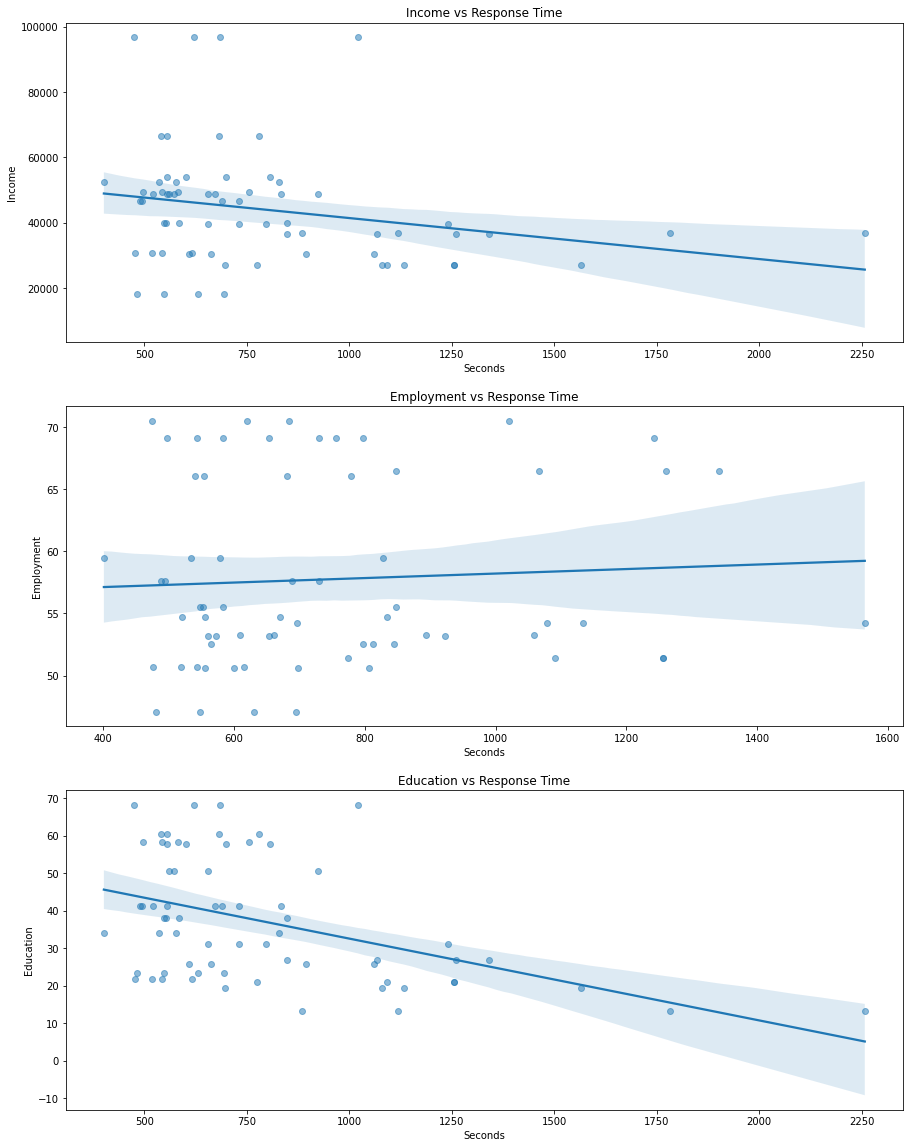

In [86]:
fig, ax = plt.subplots(3,1,figsize=(15,20))
view_3d_df = top_Call_df.groupby(['Zip','typeCall'])
seconds_avg = view_3d_df.responseSeconds.mean()
income_avg = view_3d_df.Income.mean()
employment_avg = view_3d_df.Employment.mean()
health_avg = view_3d_df.Health.mean()
edu_avg = view_3d_df.Education.mean()

avg_df_zip_type = pd.DataFrame({'Seconds':seconds_avg, 'Income':income_avg, 'Employment':employment_avg, 'Health':health_avg, 'Education':edu_avg})
sns.regplot(x=avg_df_zip_type['Seconds'], y=avg_df_zip_type['Income'],scatter_kws={'alpha':0.5},order=1, ax=ax[0]).set_title('Income vs Response Time')
sns.regplot(x=avg_df_zip_type['Seconds'], y=avg_df_zip_type['Employment'],scatter_kws={'alpha':0.5},order=1,ax=ax[1]).set_title('Employment vs Response Time')
sns.regplot(x=avg_df_zip_type['Seconds'], y=avg_df_zip_type['Education'],scatter_kws={'alpha':0.5},order=1,ax=ax[2]).set_title('Education vs Response Time')


Shown above is a regression plots of Income, Education, and Employment with the mean Response Time, grouped by Zipcode.

This correlation was unexpected as it seemed as if income and employment had no effect on the response time of the crimes. We were expecting areas with higher income to have shorter response times on average, reasoning being that the area may be more expensive for this exact reason.

We also found higher education rates to have a negative correlation with the response time of crimes.

In reality, the response times seemed to be consistently reasonable for all disparities in income.


<center><h1><strong>4. Conclusion</strong></h2></center>

While we came to the conclusion that Income did not have much of an effect on the response time of crimes, it is important to remember that the Zipcodes cover large areas with a lot of disparity in Income.

Our hypothesis was correct in predicting that in Districts where the response time was longer, there were upticks in the frequency calls for that type of Crime.

We were incorrect in that neither income, employment showed any statistically significant correlation to severity of crimes or the response time. 

What we found intersting was that education rates had a negative correlation with the response time of crimes. This means that the higher the percentage of college educated individuals in the Zip code, the lower the response time by police.
